In [1]:
import matplotlib as plt
import pandas as pd
from openbb import obb
from pandas.plotting import bootstrap_plot, scatter_matrix
obb.user.preferences.output_type = "dataframe"

In [2]:
df = obb.equity.price.historical("AAPL", provider="yfinance")

<Axes: xlabel='date'>

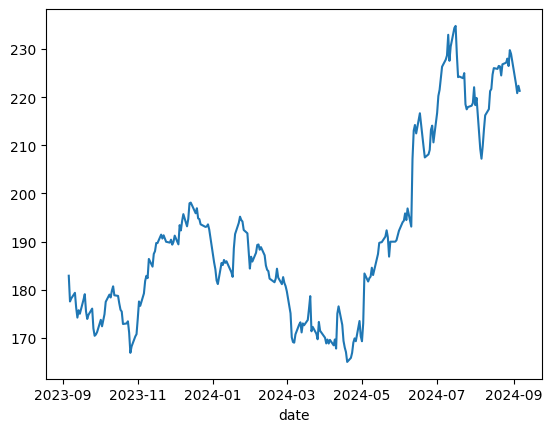

In [3]:
df.close.plot()

In [6]:
returns = df.close.pct_change()
returns.name = "return"

<Axes: title={'center': 'AAPL returns'}, xlabel='date'>

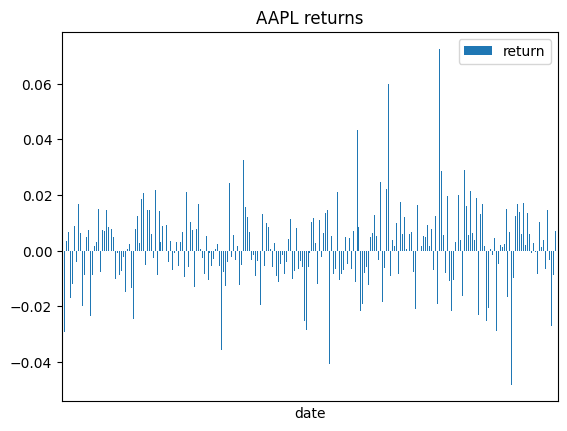

In [8]:
returns = df.close.pct_change()
returns.name = "return"
returns.plot.bar(
    title="AAPL returns",
    grid=False,
    legend=True,
    xticks=[]
)

<Axes: ylabel='Frequency'>

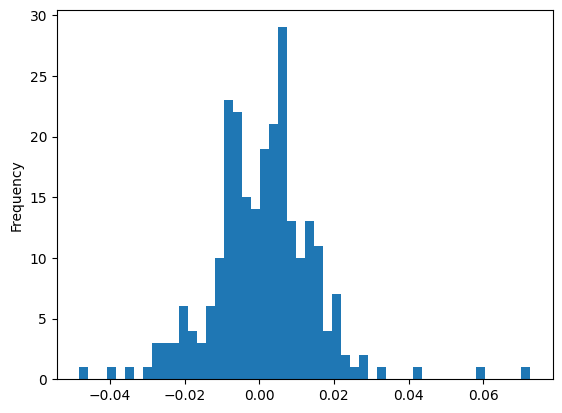

In [9]:
returns.plot.hist(bins=50)

<Axes: >

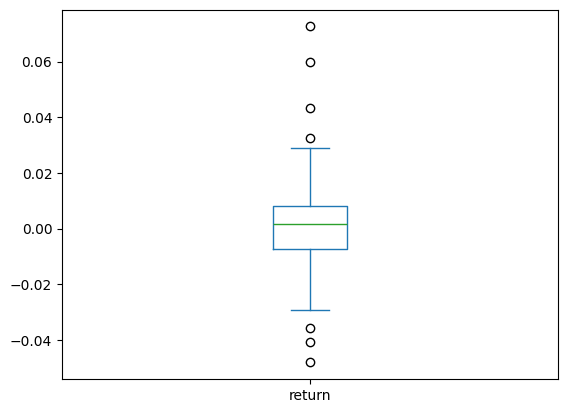

In [10]:
returns.plot.box()

In [12]:
qqq = obb.equity.price.historical("QQQ", provider="yfinance")


In [19]:
qqq_returns = qqq.close.pct_change()
asset_bench = pd.concat([returns, qqq_returns], axis=1)

<Axes: xlabel='QQQ', ylabel='AAPL'>

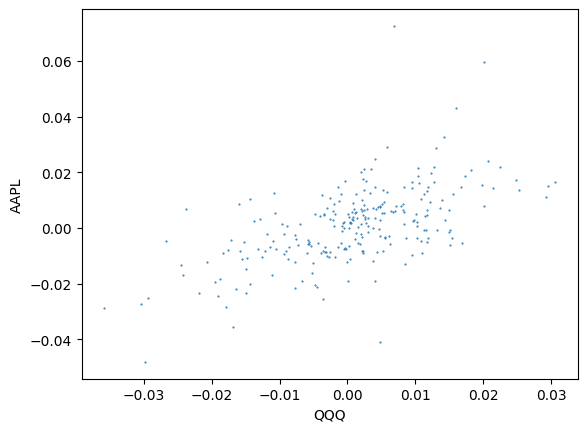

In [18]:
asset_bench.columns = ["AAPL", "QQQ"]
asset_bench.plot.scatter(x="QQQ", y="AAPL", s=0.25)

array([[<Axes: xlabel='return', ylabel='return'>,
        <Axes: xlabel='close', ylabel='return'>],
       [<Axes: xlabel='return', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>]], dtype=object)

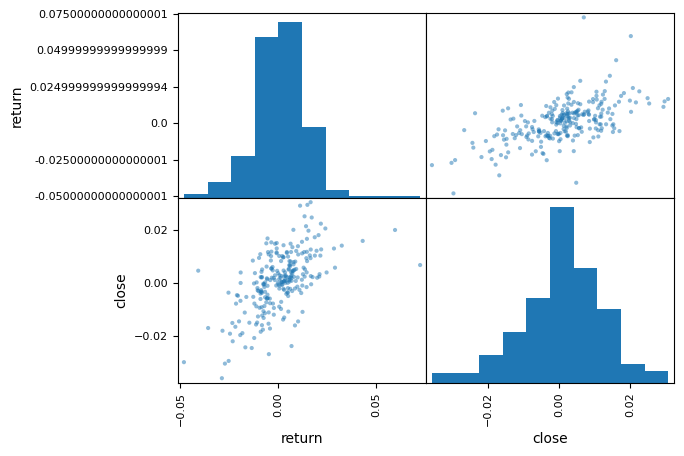

In [28]:
scatter_matrix(asset_bench)

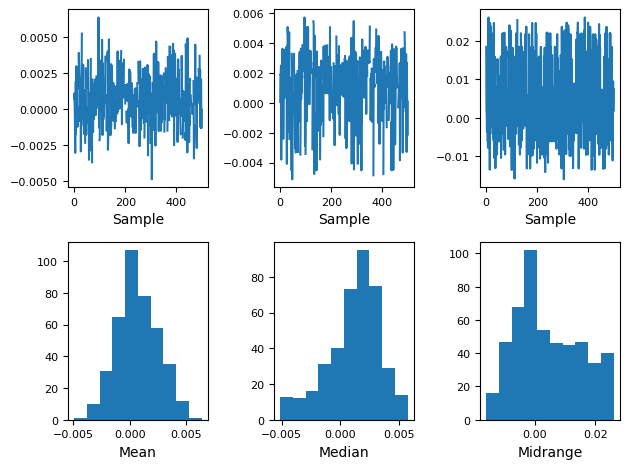

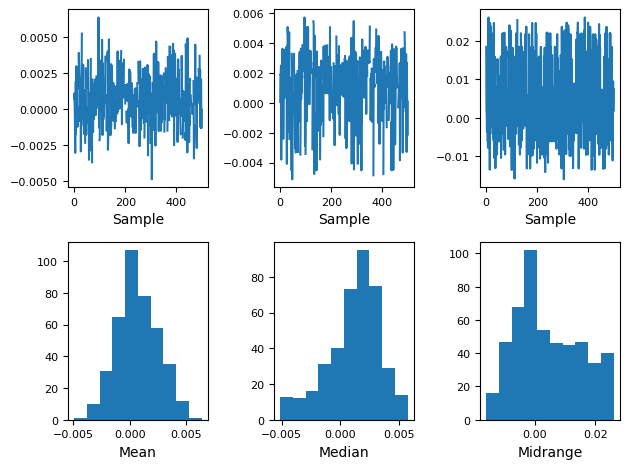

In [29]:
bootstrap_plot(returns)